## Project Scenario:

An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF). 

The required data seems to be available on the URL mentioned below:


URL: https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29

## Objectives

 - Use Webscraping to extract required information from a website.
 - Use Pandas to load and process the tabular data as a dataframe.
 - Use Numpy to manipulate the information contatined in the dataframe.
 - Load the updated dataframe to CSV file.

## Setup

For this project i will use the following libraries:
  - Pandas
  - Numpy


In [1]:
#Install required packages
!pip install pandas numpy 
!pip install lxml

You should consider upgrading via the 'C:\Users\pipe_\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\pipe_\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Importing Required Libraries

Better to import all required libraries in one place:

In [2]:
import numpy as np
import pandas as pd

# i will also use this section to suppress warnings generated by the code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## Exercises
### Exercise 1 

Extract the required GDP __(Nominal Gross Domestic Product)__ data from the given URL using Web Scraping.

URL = https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29

I will use pandas library to extract the required table directly as a DataFrame.

__Note:__ Look if the website has not changed, the required table is the third one on the website.

As you can see here:

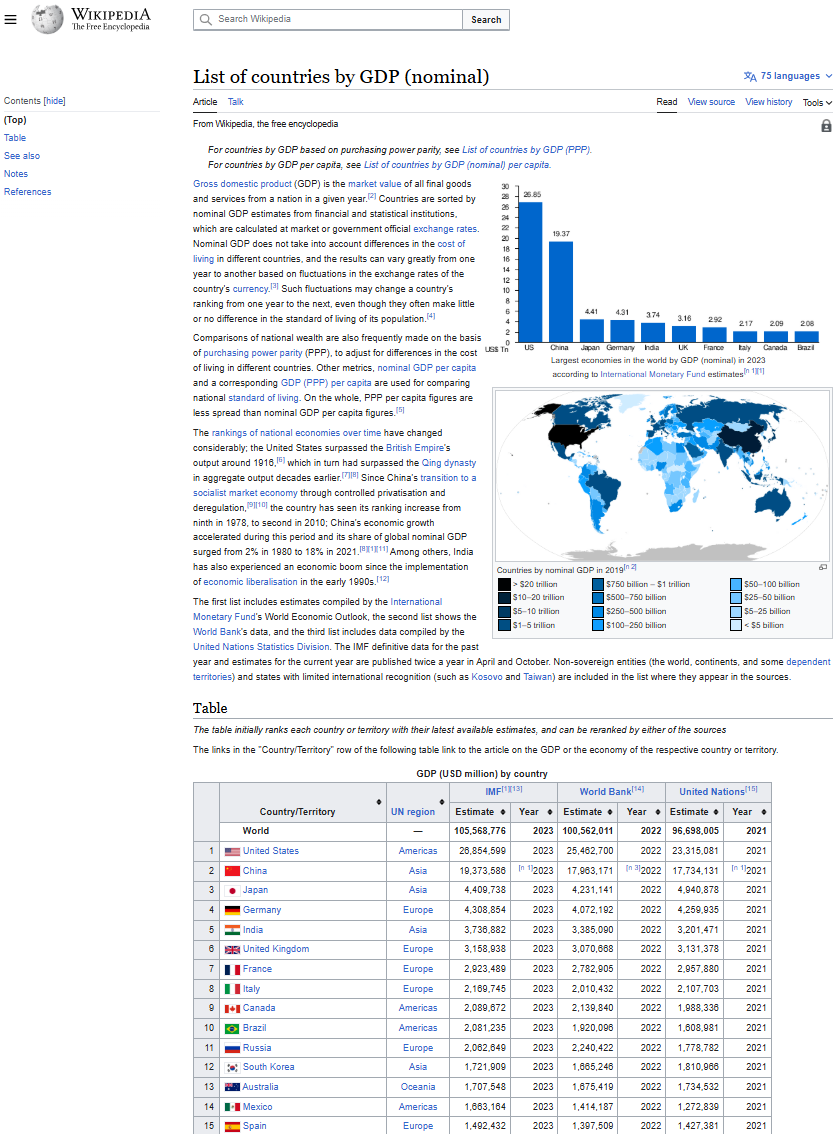

In [3]:
URL = "https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [57]:
# Extracting tables from webpage using Pandas. Retaining table number 3 as the required dataframe.
tables = pd.read_html(URL)
df = tables[3]

# Replacing the column headers with column numbers
df.columns = range(df.shape[1])
    
# Retaining columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retaining the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.loc[1:10]

# Assigning column names as "Country" and "GDP (Million USD)"
df.columns = ['Country', 'GDP (Million USD)']

### Exercise 2
Modify the GDP column of the DataFrame, converting the value available in Million USD to Billion USD. Use the `round()` method of Numpy library to round the value to 2 decimal places. Modify the header of the DataFrame to `GDP (Billion USD)`.

In [68]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.rename(columns = {'GDP (Million USD)' : 'GDP (Billion USD)'})

,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


### Exercise 3

Load the DataFrame to the CSV file named "Largest_economies.csv"

In [69]:
df.to_csv("Largest_economies.csv")

# Thank you.